In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import numpy as np
from tensorflow import keras as keras
import cv2
import os
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input, MaxPool2D, ZeroPadding2D, Cropping2D, Softmax, Add, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.utils import Sequence
from PIL import Image


from IPython.display import clear_output
import matplotlib.pyplot as plt

In [123]:
dataset_path = '../a'

In [142]:


def normalize(input_image):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    return input_image


def read_train_image(name, dataset_path):
    image = cv2.imread(dataset_path + '/train/' + name + '.jpg',1)
    resized_image = tf.image.resize(image, (256, 256), method='nearest')
    norm = normalize(resized_image).numpy()
    np.save(dataset_path + '/img/' + name + '.npy', norm)

def read_mask(name, dataset_path):
    image = np.array(Image.open(dataset_path + '/train_masks/' + name + "_mask.gif"))
    expanded_image = np.expand_dims(image, axis=-1)
    resized_image = tf.image.resize(expanded_image, (256,256), method='nearest').numpy()
    #res = tf.reshape(resized_image, (171,256)).numpy()
    np.save(dataset_path + '/mask/' + name + '.npy', resized_image)

In [143]:

from tqdm.notebook import trange, tqdm 
names = []
for i in os.listdir(dataset_path + '/train'):
    names.append(i.split(".")[0])

In [144]:
for i in tqdm(range(len(names)), desc='Loading Images...'):   
    read_train_image(names[i], dataset_path)
    read_mask(names[i], dataset_path)

In [129]:
p = cv2.imread(dataset_path + '/img/00087a6bd4dc_01.npy', 1)

In [130]:
def print_img(img):
    plt.figure(figsize=(14, 7))
    plt.subplot(1,1,1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Lena'), plt.axis('off')

In [131]:
with open(dataset_path + '/mask/00087a6bd4dc_01.npy', 'rb') as f:
    p = np.expand_dims(np.load(f),axis=2) 

In [132]:
np.unique(p)

array([0, 1], dtype=uint8)

In [59]:
read_mask(names[0], dataset_path)

In [69]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']
    #display_list[1] = np.expand_dims(display_list[1],axis=2)

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

In [133]:
with open(dataset_path + '/img/00087a6bd4dc_01.npy', 'rb') as f:
    r = np.load(f) 

In [134]:
r = np.expand_dims(r,axis=0)
r.shape

(1, 256, 256, 3)

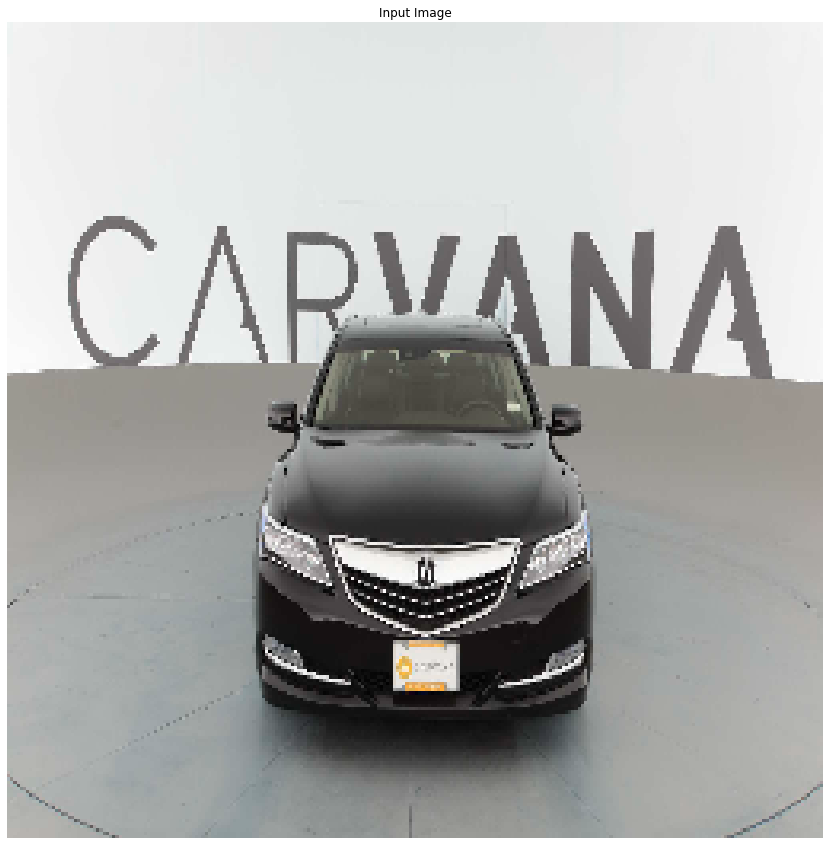

In [135]:
display(r)

In [94]:

image = np.array(Image.open(dataset_path + "/train_masks/0cdf5b5d0ce1_01_mask.gif"))

In [95]:
expanded_image = np.expand_dims(image, axis=-1)
print(np.unique(expanded_image))
resized_image = tf.image.resize(expanded_image, (171,256), method='nearest', preserve_aspect_ratio=True)
print(np.unique(resized_image.numpy()))
res = tf.reshape(resized_image, (171,256))
print(np.unique(res.numpy()))


[0 1]
[0 1]
[0 1]


In [96]:
#res = np.expand_dims(res,axis=0)
res = np.expand_dims(res,axis=2)
res.shape

(171, 256, 1)

In [97]:
np.unique(res)

array([0, 1], dtype=uint8)

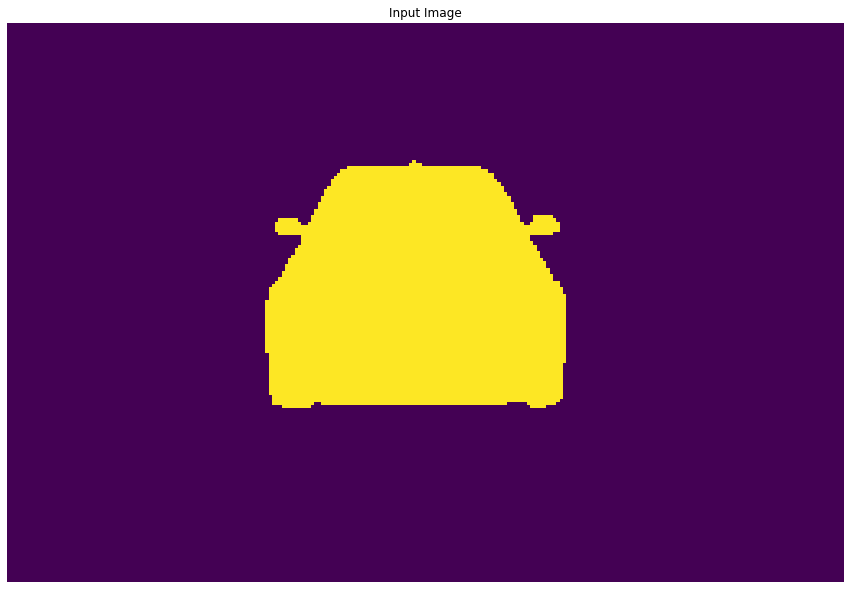

In [98]:
display([resized_image])

In [121]:
u = []
for i in os.listdir(dataset_path + "/mask"):
    with open(dataset_path + '/mask/' + i, 'rb') as f:
        r = np.load(f) 
    a = np.unique(r)
    for p in a:
        if p not in u:
            u.append(p)

In [122]:
u

[0, 1]

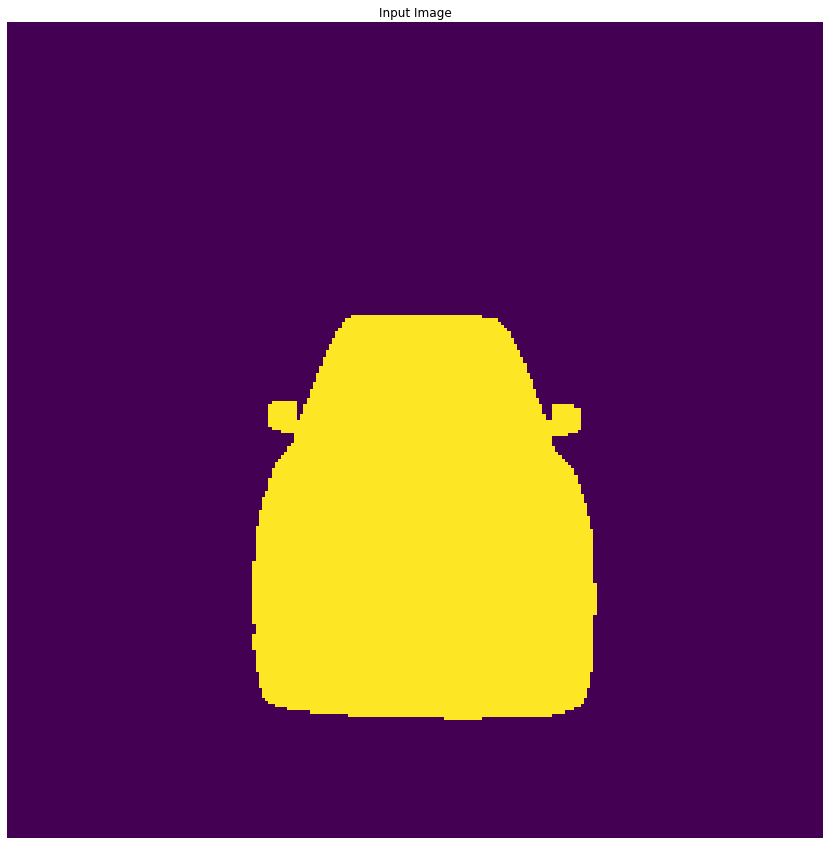

In [141]:
with open(dataset_path + '/mask/00087a6bd4dc_01.npy', 'rb') as f:
    r = np.load(f) 
#r = np.expand_dims(r,axis=0)
r.shape
display([r])